<a href="https://colab.research.google.com/github/ZhenZhangz/E4511/blob/main/Curate_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

---




In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-08 07:52:20--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   175MB/s    in 2.9s    

2021-04-08 07:52:23 (175 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - a

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m11.530s
user	0m7.885s
sys	0m1.802s
--2021-04-08 08:01:10--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [ ]:
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [ ]:
! pip install MolVS
! pip install bravado
! pip install UMAP

     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for MolVS: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=dbaddcd77e9e668ecd79298574c99fff279aaea228ebd9c476deb0b1fd009609
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
Successfully built MolVS
     |████████████████████████████████| 133kB 7.5MB/s 
     |████████████████████████████████| 71kB 19.5MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=51306736032466401f264c4e5327683ee12545681f659d9ada119e8d3cc9341e
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
  Created wheel for UMAP: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=e17711b054f54fc84e0ad8ff819b2d72c55bf8ac43505230eefd83dc1c435366
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94cca

In [ ]:
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [ ]:
from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

# Curate

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/'

In [ ]:
chembl = pd.read_csv(path+'CHEMBL_curated.csv', header=0, index_col=0)
dtc = pd.read_csv(path+'DTC_Curated.csv',header=0, index_col=0)
excape = pd.read_csv(path+'Excape_Curated.csv',header=0, index_col=0)

In [ ]:

excape.rename( columns={"pXC50" : "PXC50"}, inplace = True)


In [ ]:
excape.rename( columns={"Original_Entry_ID" : "compound_id","Activity_Flag" : "active"}, inplace = True)

In [ ]:
excape_ = excape.loc[:,['compound_id','base_rdkit_smiles','PXC50','active']]

In [ ]:
excape_.active = excape_.active.map({'A':1, 'N':0})


In [ ]:
excape_ = excape_.iloc[:,1:]
excape_

,compound_id,base_rdkit_smiles,PXC50,active
0,24962988,CCOC(=O)N(Cc1ccccc1-c1ccccc1)[C@H]1CCNC1,5.95468,1
1,CHEMBL445,CNCCC=C1c2ccccc2CCc2ccccc21,8.16000,1
2,CHEMBL2113052,COc1ccc(CNC2C[C@@H](C(c3ccccc3)c3ccccc3)OC[C@H...,6.10000,1
3,11514389,NCC1CCC(CCc2cccc3ccccc23)O1,7.74473,1
4,10263646,CNC1CCC(c2c[nH]c3ccc(C#N)cc23)C1,8.07058,1
...,...,...,...,...
3765,CHEMBL555565,O=C(c1ccccc1)N(c1ccc2[nH]ccc2c1)C1CCNCC1,7.60000,1
3766,CHEMBL3084608,CCCCc1cccc(N2[C@H]3CC[C@@H]2C[C@@H](OC(c2ccccc...,6.13000,1
3767,CHEMBL369997,CCCC(C(=O)c1ccc(-c2cccs2)cc1)N1CCCC1,5.71000,1
3768,CHEMBL3298870,CC(NC1CC1)C(=O)c1ccc(Cl)c(Cl)c1,6.45000,1


In [ ]:
chembl.drop('relation',axis=1,inplace=True)
chembl

,compound_id,base_rdkit_smiles,PXC50,active
0,CHEMBL461153,CCn1c(=O)n([C@H](CCNC)c2ccccc2)c2ccccc21,5.37,0
1,CHEMBL562115,COC(=O)[C@H]1[C@@H](c2ccc(C)cc2)C[C@@H]2CC[C@H...,6.79,1
2,CHEMBL4088715,[O-][S+](Cc1ccsc1Br)C(c1ccccc1)c1ccccc1,4.22,0
3,CHEMBL2338037,COc1cc(Cl)ccc1O[C@H](c1ccccc1)[C@@H]1CCNC1,9.20,1
4,CHEMBL50858,COC(=O)C1C2CC[C@H](C[C@@H]1c1ccc(Cl)c(C)c1)N2C,9.00,1
...,...,...,...,...
2546,CHEMBL388850,CN1C2CCC1[C@@H](c1ccccc1)[C@@H](c1ccccc1)C2,4.68,0
2547,CHEMBL250962,CCN(CC)CC1CC1c1ccc2ccccc2c1,6.26,1
2548,CHEMBL4073400,Fc1ccc(C(OCCN2CCC(Cc3ccccc3)CC2)c2ccc(F)cc2)cc1,5.78,0
2549,CHEMBL111201,O=S(=O)(Nc1ccc(CCNC[C@H](O)c2cccnc2)cc1)c1ccc(...,5.30,0


In [ ]:
dtc.drop('relation',axis=1,inplace=True)

In [ ]:
dtc.rename( columns={"pXC50" : "PXC50"}, inplace = True)
dtc

,compound_id,base_rdkit_smiles,PXC50,active
0,WSEQXVZVJXJVFP-UHFFFAOYSA-N,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,6.937266,1
1,ZINGRQZUIVEPKX-UHFFFAOYSA-N,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1,8.522879,1
2,KVWDHTXUZHCGIO-UHFFFAOYSA-N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1,5.985900,0
3,QSQQQURBVYWZKJ-UHFFFAOYSA-N,CC(N)Cc1c[nH]c2ccccc12,5.630000,0
4,NTBRVAZZXJHBGJ-UHFFFAOYSA-N,Clc1cccc(OC(c2cccnc2)C2CCNCC2)c1Cl,8.212129,1
5,JYIMWQCCVNSNJW-UHFFFAOYSA-N,COc1ccc2cc(C(O)CCN3CC=C(Cc4ccccc4)CC3)ccc2c1Cl,6.576754,1
6,LNEPOXFFQSENCJ-UHFFFAOYSA-N,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,5.470313,0
7,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,7.807112,1
8,ZNRGQMMCGHDTEI-ITGUQSILSA-N,CN1[C@H]2CC[C@@H]1CC(OC(=O)c1c[nH]c3ccccc13)C2,6.311580,1
9,HGRHWEAUHXYNNP-UHFFFAOYSA-N,C=CCN(CC=C)CCc1c[nH]c2ccc(OC)cc12,5.060000,0


In [ ]:
dtc_v =dtc['base_rdkit_smiles'].tolist()
chembl_v =chembl['base_rdkit_smiles'].tolist()
excape_v = excape_['base_rdkit_smiles'].tolist()
from matplotlib_venn import venn3

Text(0.5, 1.0, 'SLC6A3')

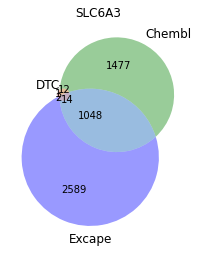

In [ ]:
dlst = [set(dtc_v),set(chembl_v), set(excape_v)]

fig = plt.figure()
venn3(dlst, ('DTC', 'Chembl','Excape'))
plt.title('SLC6A3')

In [ ]:
comb_df =  pd.concat([dtc,chembl,excape_])
comb_df

,compound_id,base_rdkit_smiles,PXC50,active
0,WSEQXVZVJXJVFP-UHFFFAOYSA-N,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,6.937266,1
1,ZINGRQZUIVEPKX-UHFFFAOYSA-N,N#Cc1ccc2ccc(OCC3CCNCC3)cc2c1,8.522879,1
2,KVWDHTXUZHCGIO-UHFFFAOYSA-N,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1,5.985900,0
3,QSQQQURBVYWZKJ-UHFFFAOYSA-N,CC(N)Cc1c[nH]c2ccccc12,5.630000,0
4,NTBRVAZZXJHBGJ-UHFFFAOYSA-N,Clc1cccc(OC(c2cccnc2)C2CCNCC2)c1Cl,8.212129,1
...,...,...,...,...
3765,CHEMBL555565,O=C(c1ccccc1)N(c1ccc2[nH]ccc2c1)C1CCNCC1,7.600000,1
3766,CHEMBL3084608,CCCCc1cccc(N2[C@H]3CC[C@@H]2C[C@@H](OC(c2ccccc...,6.130000,1
3767,CHEMBL369997,CCCC(C(=O)c1ccc(-c2cccs2)cc1)N1CCCC1,5.710000,1
3768,CHEMBL3298870,CC(NC1CC1)C(=O)c1ccc(Cl)c(Cl)c1,6.450000,1


In [ ]:
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (6169, 8)
List of 'bad' duplicates removed
                      compound_id     PXC50  ...   Perc_Var  VALUE_NUM_std
3468                     10575547  6.943100  ...  12.410650       1.084065
4569                     43565977  6.213960  ...  13.352475       1.035176
5916                     44613068  6.162410  ...  15.374901       1.161359
3151                     44613452  6.320570  ...  13.878296       1.089347
4719                     44613690  6.223300  ...  15.585561       1.186737
...                           ...       ...  ...        ...            ...
2390                    CHEMBL629  7.520000  ...  19.459889       1.732412
5980                    CHEMBL629  5.070000  ...  19.459889       1.732412
1929                  CHEMBL99946  6.500000  ...  10.779118       1.110568
11    SHXWCVYOXRDMCX-UHFFFAOYSA-N  5.437404  ...  19.916757       2.043121
0     WSEQXVZVJXJVFP-UHFFFAOYSA-N  6.937266  ...  10.668498       1.346995

[64 r

Post-processing dataset

Total Number of results = 5112
dataset mean = 6.993123126943403 NM
dataset stdev = 1.2566862250006634 NM
dataset max = 11.0 NM
dataset min = 2.33 NM



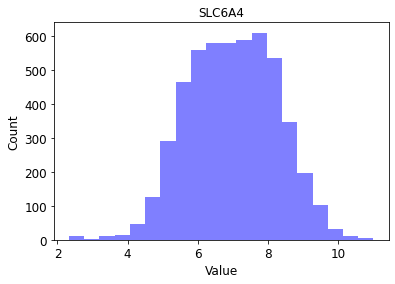

In [ ]:
column = 'PXC50'

# # of 'bins' for the histogram
num_bins = 20

title = 'SLC6A4'

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [ ]:
curated_df.to_csv('drive/MyDrive/curated_combined_df.csv')

In [ ]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_chembl = chembl['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_chembl) :
    s1,s2=smiles_dtc,smiles_chembl
else:
    s1,s2=smiles_chembl,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

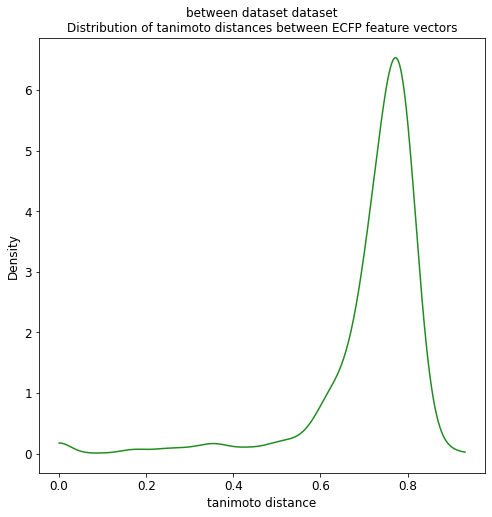

In [ ]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [ ]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_excape = excape_['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_excape) :
    s1,s2=smiles_dtc,smiles_excape
else:
    s1,s2=smiles_excape,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

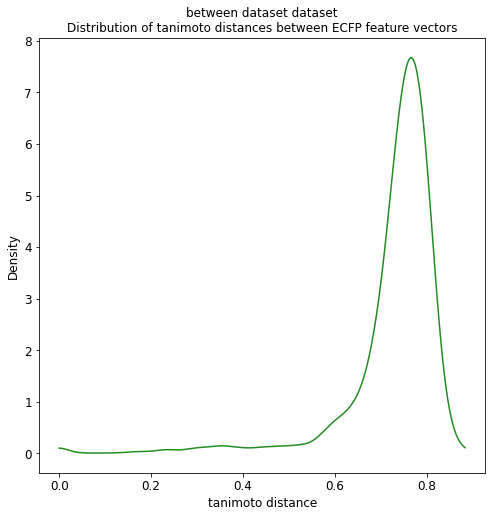

In [ ]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')